In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from sklearn.manifold import TSNE


In [22]:
def tsne(x_train_filename, x_test_filename, y_train_filename, y_test_filename , plot_name):
    
    # Load dataset
    df_X_train = pd.read_csv(x_train_filename, header=None)
    df_Y_train = pd.read_csv(y_train_filename, header=None)

    df_X_test = pd.read_csv(x_test_filename, header=None)
    df_Y_test = pd.read_csv(y_test_filename, header=None)

    X = pd.concat([df_X_train, df_X_test])
    Y = pd.concat([df_Y_train, df_Y_test])

    X = np.array(X)
    Y= np.array(Y).astype(np.int8)

    target_dict = {0:'not readmited' , 1:'readmited'}
    target_ind = target_dict.keys()
    target_val = target_dict.values()


    index_tot = np.array([])

    for i in target_ind :
#        print(i)
        n_int = np.nonzero(Y==i)[0]

        index_int = np.random.permutation(n_int)[:600]
        #index_int = np.random.permutation(n_int)[:2]
        index_tot = np.concatenate( (index_tot, index_int) )

        index_tot = index_tot.astype(int)


    X_plot = X[index_tot]
    Y_plot = Y[index_tot]

    tsne = TSNE(n_components=2)
    components = tsne.fit_transform(X_plot)

    df = pd.DataFrame(data = components,
                              columns = ['component 1' ,
                                        'component 2'])

    df = pd.DataFrame(data = components,
                              columns = ['component 1' ,
                                        'component 2'])

    labels = pd.DataFrame(Y_plot)

    finalDf = pd.concat([df, labels] , axis=1)

    fig = plt.figure(figsize = (8,8))

    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Component 1', fontsize = 15)
    ax.set_ylabel('Component 2', fontsize = 15)
    ax.set_title('2 components TSNE', fontsize = 20)

    colors = ['r', 'g'] #k = black #m = magenta
    for target, color in zip(target_ind , colors):
        #print(target)
        #indicesToKeep = finalDf[187] == target
        indicesToKeep = labels == target
        indicesToKeep = indicesToKeep.values[:,0]
        #print(indicesToKeep)
        ax.scatter(finalDf.loc[indicesToKeep, 'component 1']
                   , finalDf.loc[indicesToKeep, 'component 2']
                   , c = color
                   , s = 50)
    ax.legend(target_val)
    ax.grid()

    plt.savefig(plot_name)
        #'plot_tnse_readmited.png')
    #plt.show()

Here is an example of how to run the function tsne(x_train_filename, x_test_filename, y_train_filename, y_test_filename , plot_name):

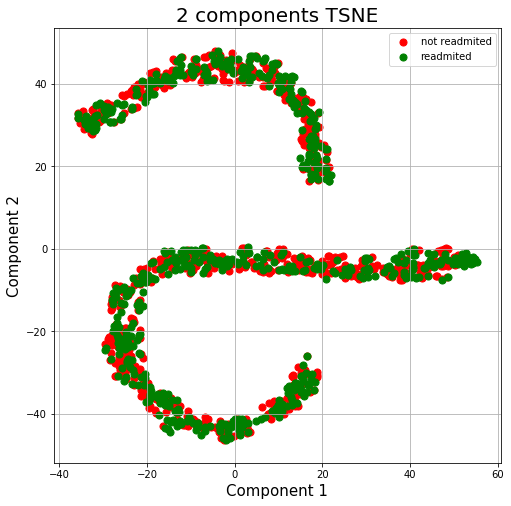

In [19]:
#tsne("simple_x_train.csv", "simple_x_test.csv" , "simple_y_train.csv" , "simple_y_test.csv" , 'plot_tnse_readmited.png')